In [1]:
"""# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session"""

'# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session'

**ASHUTOSH KUMAR
22566004
DATA SCIENCE**

In [2]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
data_dir = '../input/gtsrb-german-traffic-sign'
train_dir = '../input/gtsrb-german-traffic-sign/Train'
test_dir = '/kaggle/input/gtsrb-german-traffic-sign/'
train_dir, test_dir

('../input/gtsrb-german-traffic-sign/Train',
 '/kaggle/input/gtsrb-german-traffic-sign/')

In [4]:
torch.cuda.empty_cache()

In [5]:
import os
NUM_CATEGORIES = len(os.listdir(train_dir))
NUM_CATEGORIES
IMG_HEIGHT = 30
IMG_WIDTH = 30
chennels = 3

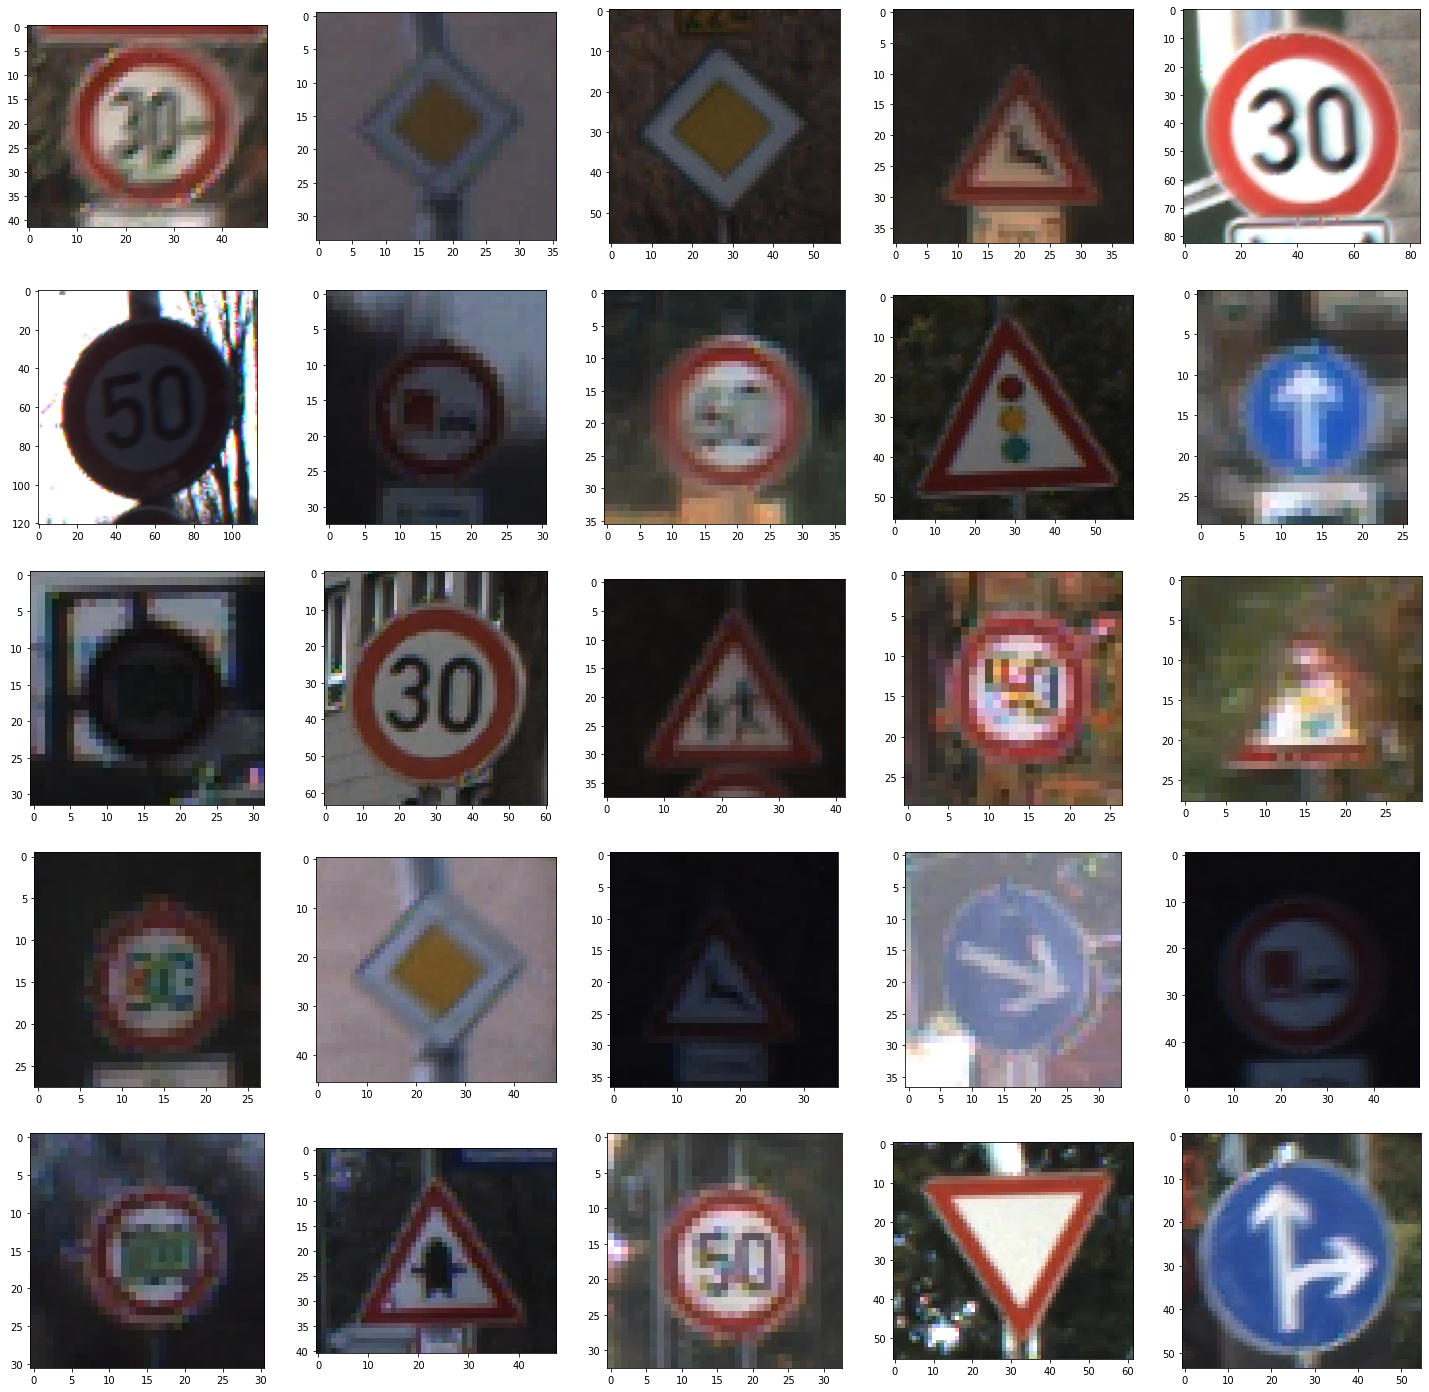

In [6]:
import random
from matplotlib.image import imread
test = pd.read_csv(data_dir+'/Test.csv')
imgs = test["Path"].values
plt.figure(figsize=(25,25))
for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path = data_dir + "/" + random.choice(imgs)
    rand_image = imread(random_image_path)
    plt.imshow(rand_image)
    plt.grid(False)
    


In [7]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [8]:
train_transform = transforms.Compose([
    transforms.Resize(size=(256,256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(size=(256,256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                        std=[0.229,0.224,0.225])
])

In [9]:
train_dataset = datasets.ImageFolder(train_dir,transform=train_transform)

In [10]:
val_dataset = datasets.ImageFolder(train_dir,transform=val_transform)

In [11]:
print(len(train_dataset.classes))
print(len(train_dataset))

43
39209


In [12]:
torch.manual_seed(42)
split = int(len(train_dataset)*0.2)
indices = torch.randperm(len(train_dataset))
train_dataset = torch.utils.data.Subset(train_dataset,indices[split:])
val_dataset = torch.utils.data.Subset(val_dataset,indices[:split])
len(train_dataset),len(val_dataset)

(31368, 7841)

In [13]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=32,shuffle=True,num_workers=2)
val_dataloader = torch.utils.data.DataLoader(dataset=val_dataset,batch_size=32,shuffle=False,num_workers=2)

In [14]:
classes = train_dataloader.dataset.dataset.classes
len(classes)
classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '5',
 '6',
 '7',
 '8',
 '9']

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [16]:
import torchvision
from torchvision import models

In [17]:
model = torchvision.models.resnet18(pretrained=True).to(device)

In [18]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
torch.manual_seed(42)
output_shape = len(classes)
model.classifier = nn.Linear(1280,output_shape)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [21]:
from time import time
from tqdm import tqdm


def train(model,
          criterion,
          optimizer,
          train_dataloader,
          test_dataloader,
          print_every,
          num_epoch):
    steps = 0
    train_losses,val_losses,train_acc,val_acc = [], [],[],[]

    model.to(device)
    for epoch in tqdm(range(num_epoch)):
        running_loss = 0
        correct_train = 0
        total_train = 0
        start_time = time()
        iter_time = time()
        model.train()
        for i, (images, labels) in enumerate(train_dataloader):
            steps += 1
            images = images.to(device)
            labels = labels.to(device)
            output = model(images)
            loss = criterion(output, labels)
            correct_train += (torch.max(output, dim=1)[1] == labels).sum()
            total_train += labels.size(0)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if steps % print_every == 0:
                print(f'Epoch [{epoch + 1}]/[{num_epoch}]. Batch [{i + 1}]/[{len(train_dataloader)}].', end=' ')
                print(f'Train loss {running_loss / steps:.3f}.', end=' ')
                print(f'Train acc {correct_train / total_train * 100:.3f}.', end=' ')
                with torch.no_grad():
                    model.eval()
                    correct_val, total_val = 0, 0
                    val_loss = 0
                    for images, labels in test_dataloader:
                        images = images.to(device)
                        labels = labels.to(device)
                        output = model(images)
                        loss = criterion(output, labels)
                        val_loss += loss.item()
                        correct_val += (torch.max(output, dim=1)[1] == labels).sum()
                        total_val += labels.size(0)
                    print(f'Val loss {val_loss / len(test_dataloader):.3f}. Val acc {correct_val / total_val * 100:.3f}.', end=' ')
                    print(f'Took {time() - iter_time:.3f} seconds')
                    iter_time = time()
                    train_acc.append((correct_train / total_train) * 100)
                    val_acc.append((correct_val / total_val) * 100)
                    train_losses.append(running_loss / total_train)
                    val_losses.append(val_loss / total_val)
                print(f'Epoch took {time() - start_time}') 
                torch.save(model, f'checkpoint_{correct_val / total_val * 100:.2f}')
    return model, train_losses, val_losses, train_acc, val_acc

In [22]:
print_every = 100
model, train_losses, val_losses, train_acc, val_acc = train(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    train_dataloader=train_dataloader,
    test_dataloader=val_dataloader,
    print_every=print_every,
    num_epoch=2
)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [1]/[2]. Batch [100]/[981]. Train loss 2.882. Train acc 50.000. Val loss 0.571. Val acc 84.772. Took 31.518 seconds
Epoch took 31.51912760734558
Epoch [1]/[2]. Batch [200]/[981]. Train loss 1.752. Train acc 66.000. Val loss 0.288. Val acc 91.965. Took 29.842 seconds
Epoch took 61.36081600189209
Epoch [1]/[2]. Batch [300]/[981]. Train loss 1.256. Train acc 74.729. Val loss 0.195. Val acc 94.070. Took 30.039 seconds
Epoch took 91.4002628326416
Epoch [1]/[2]. Batch [400]/[981]. Train loss 0.970. Train acc 80.242. Val loss 0.063. Val acc 97.755. Took 30.361 seconds
Epoch took 121.76129651069641
Epoch [1]/[2]. Batch [500]/[981]. Train loss 0.793. Train acc 83.669. Val loss 0.038. Val acc 98.903. Took 29.634 seconds
Epoch took 151.39554023742676
Epoch [1]/[2]. Batch [600]/[981]. Train loss 0.672. Train acc 86.062. Val loss 0.067. Val acc 97.959. Took 30.272 seconds
Epoch took 181.66753554344177
Epoch [1]/[2]. Batch [700]/[981]. Train loss 0.585. Train acc 87.812. Val loss 0.059. Val ac

 50%|█████     | 1/2 [04:38<04:38, 278.02s/it]

Epoch [2]/[2]. Batch [19]/[981]. Train loss 0.002. Train acc 98.191. Val loss 0.053. Val acc 98.941. Took 21.721 seconds
Epoch took 21.721920013427734
Epoch [2]/[2]. Batch [119]/[981]. Train loss 0.006. Train acc 98.871. Val loss 0.025. Val acc 99.273. Took 29.769 seconds
Epoch took 51.49038004875183
Epoch [2]/[2]. Batch [219]/[981]. Train loss 0.007. Train acc 99.130. Val loss 0.015. Val acc 99.592. Took 29.700 seconds
Epoch took 81.1906385421753
Epoch [2]/[2]. Batch [319]/[981]. Train loss 0.008. Train acc 99.255. Val loss 0.018. Val acc 99.528. Took 29.535 seconds
Epoch took 110.7256076335907
Epoch [2]/[2]. Batch [419]/[981]. Train loss 0.008. Train acc 99.344. Val loss 0.032. Val acc 98.929. Took 29.698 seconds
Epoch took 140.42368578910828
Epoch [2]/[2]. Batch [519]/[981]. Train loss 0.010. Train acc 99.296. Val loss 0.046. Val acc 98.635. Took 29.730 seconds
Epoch took 170.15394830703735
Epoch [2]/[2]. Batch [619]/[981]. Train loss 0.011. Train acc 99.278. Val loss 0.021. Val acc

100%|██████████| 2/2 [09:32<00:00, 286.34s/it]


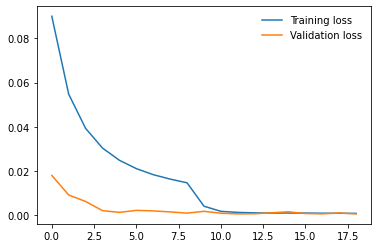

In [23]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [24]:
import numpy
for i in range(len(train_acc)):
    train_acc[i] = train_acc[i].cpu().numpy()

for j in range(len(val_acc)):
    val_acc[j] = val_acc[j].cpu().numpy()

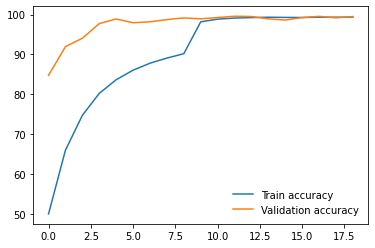

In [25]:
plt.plot(train_acc,label= "Train accuracy")
plt.plot(val_acc,label="Validation accuracy")
plt.legend(frameon=False)
plt.show()

In [26]:
!pip install grad-cam

In [27]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

In [28]:
from PIL import Image
from pathlib import Path
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [29]:
transform_gc = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [30]:
test_dir

'/kaggle/input/gtsrb-german-traffic-sign/'

(43, 43, 3)


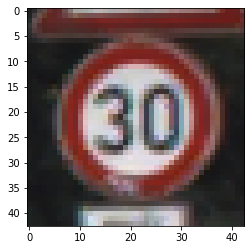

In [31]:

img_path =  '/kaggle/input/gtsrb-german-traffic-sign/Test/00091.png'
image = imread(img_path)
plt.imshow(image)
print(image.shape)

In [34]:
target_layers = [model.layer4[-1]]
input_img = Image.open(img_path)

input_tensor = transform_gc(input_img)
#change 3d tensor to 4d tensor
input_tensor_cam = input_tensor[None,:,:,:]

print(input_tensor_cam.shape)

torch.Size([1, 3, 224, 224])


In [36]:
cam = GradCAM(model = model, target_layers = target_layers ,use_cuda=True)
targets = [ClassifierOutputTarget(1)]
grayscale_cam = cam(input_tensor=input_tensor_cam, targets=targets)
grayscale_cam = grayscale_cam[0, :]

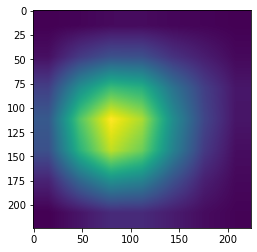

In [37]:
import matplotlib.pyplot as plt

plt.imshow(grayscale_cam)

**VISION_Transformer**

In [38]:
import numpy as np
import pandas as pd

In [39]:
def set_seeds(seed: int=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
set_seeds()

In [40]:
import torchvision
model = torchvision.models.vit_b_32(pretrained=True)

Downloading: "https://download.pytorch.org/models/vit_b_32-d86f8d99.pth" to /root/.cache/torch/hub/checkpoints/vit_b_32-d86f8d99.pth


  0%|          | 0.00/337M [00:00<?, ?B/s]

In [41]:
model

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (linear_1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (dropout_1): Dropout(p=0.0, inplace=False)
          (linear_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout_2): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
 

In [42]:
embedding_dim = 768
set_seeds()
model.heads = nn.Sequential(
        nn.LayerNorm(normalized_shape=embedding_dim),
        nn.Linear(in_features=embedding_dim,
        out_features=43)
)
model.to(device)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (linear_1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (dropout_1): Dropout(p=0.0, inplace=False)
          (linear_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout_2): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
 

In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.9)

In [44]:
from time import time
from tqdm import tqdm


def train(model,
          criterion,
          optimizer,
          train_dataloader,
          test_dataloader,
          print_every,
          num_epoch):
    steps = 0
    train_losses,val_losses,train_acc,val_acc = [], [],[],[]

    model.to(device)
    for epoch in tqdm(range(num_epoch)):
        running_loss = 0
        correct_train = 0
        total_train = 0
        start_time = time()
        iter_time = time()
        model.train()
        for i, (images, labels) in enumerate(train_dataloader):
            steps += 1
            images = images.to(device)
            labels = labels.to(device)
            output = model(images)
            loss = criterion(output, labels)
            correct_train += (torch.max(output, dim=1)[1] == labels).sum()
            total_train += labels.size(0)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if steps % print_every == 0:
                print(f'Epoch [{epoch + 1}]/[{num_epoch}]. Batch [{i + 1}]/[{len(train_dataloader)}].', end=' ')
                print(f'Train loss {running_loss / steps:.3f}.', end=' ')
                print(f'Train acc {correct_train / total_train * 100:.3f}.', end=' ')
                with torch.no_grad():
                    model.eval()
                    correct_val, total_val = 0, 0
                    val_loss = 0
                    for images, labels in test_dataloader:
                        images = images.to(device)
                        labels = labels.to(device)
                        output = model(images)
                        loss = criterion(output, labels)
                        val_loss += loss.item()
                        correct_val += (torch.max(output, dim=1)[1] == labels).sum()
                        total_val += labels.size(0)
                    print(f'Val loss {val_loss / len(test_dataloader):.3f}. Val acc {correct_val / total_val * 100:.3f}.', end=' ')
                    print(f'Took {time() - iter_time:.3f} seconds')
                    iter_time = time()
                    train_acc.append((correct_train / total_train) * 100)
                    val_acc.append((correct_val / total_val) * 100)
                    train_losses.append(running_loss / total_train)
                    val_losses.append(val_loss / total_val)
                print(f'Epoch took {time() - start_time}') 
                torch.save(model, f'checkpoint_{correct_val / total_val * 100:.2f}')
    return model, train_losses, val_losses, train_acc, val_acc

In [45]:
print_every = 400
model, train_losses, val_losses, train_acc, val_acc = train(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    train_dataloader=train_dataloader,
    test_dataloader=val_dataloader,
    print_every=print_every,
    num_epoch=2
)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [1]/[2]. Batch [400]/[981]. Train loss 0.889. Train acc 75.438. Val loss 0.239. Val acc 93.355. Took 89.706 seconds
Epoch took 89.70655083656311
Epoch [1]/[2]. Batch [800]/[981]. Train loss 0.497. Train acc 86.203. Val loss 0.056. Val acc 98.393. Took 91.500 seconds
Epoch took 181.20613551139832


 50%|█████     | 1/2 [03:31<03:31, 211.64s/it]

Epoch [2]/[2]. Batch [219]/[981]. Train loss 0.004. Train acc 99.401. Val loss 0.017. Val acc 99.566. Took 60.192 seconds
Epoch took 60.192912340164185
Epoch [2]/[2]. Batch [619]/[981]. Train loss 0.006. Train acc 99.616. Val loss 0.025. Val acc 99.311. Took 90.585 seconds
Epoch took 150.777818441391


100%|██████████| 2/2 [07:02<00:00, 211.49s/it]


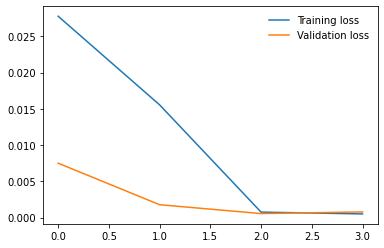

In [46]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [47]:
import numpy
for i in range(len(train_acc)):
    train_acc[i] = train_acc[i].cpu().numpy()

for j in range(len(val_acc)):
    val_acc[j] = val_acc[j].cpu().numpy()

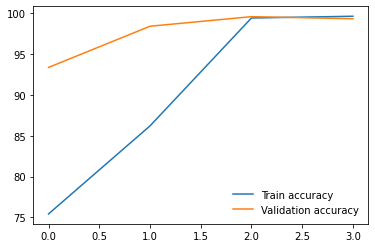

In [48]:
plt.plot(train_acc,label= "Train accuracy")
plt.plot(val_acc,label="Validation accuracy")
plt.legend(frameon=False)
plt.show()

**ATTENTION MAP**

In [49]:
import cv2
import numpy as np

In [50]:
transform_vit = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [51]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

(43, 43, 3)


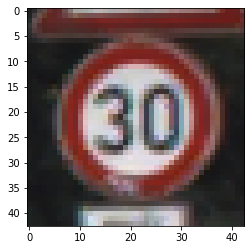

In [52]:
img_path =  '/kaggle/input/gtsrb-german-traffic-sign/Test/00091.png'
image = imread(img_path)
plt.imshow(image)
print(image.shape)

In [54]:
input_img_vit = Image.open(img_path)

input_tensor_vit = transform(input_img).to(device)

print(input_tensor_vit.shape)


torch.Size([3, 224, 224])


In [55]:
attention_mat = {}
def get_activation(name):
  def hook(model,input, output):
    attention_mat[name] = output.detach()
  return hook

In [56]:
model.encoder.layers.encoder_layer_11.register_forward_hook(get_activation('Encoder'))
output = model(input_tensor_vit.unsqueeze(0))
att_mat = attention_mat['Encoder']
print(attention_mat['Encoder'].shape)

torch.Size([1, 50, 768])


In [57]:
att_mat = torch.squeeze(att_mat,1)
att_mat = torch.mean(att_mat, dim=1)

In [58]:
att_mat.shape

torch.Size([1, 768])

In [59]:
logits = model(input_tensor_vit.unsqueeze(0))

# To account for residual connections, we add an identity matrix to the
# attention matrix and re-normalize the weights.
residual_att = torch.eye(att_mat.size(0)).to(device)
aug_att_mat = att_mat + residual_att
aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)

# Recursively multiply the weight matrices
joint_attentions = torch.zeros(aug_att_mat.size())
joint_attentions[0] = aug_att_mat[0]

for n in range(1, aug_att_mat.size(0)):
    joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])
    
# Attention from the output token to the input space.
v = joint_attentions
grid_size = int(np.sqrt(aug_att_mat.size(-1)))
mask = v[0, 39:].reshape(grid_size, grid_size).detach().numpy()
mask = cv2.resize(mask / mask.max(), input_img.size)[..., np.newaxis]
result = (mask * input_img).astype("uint8")

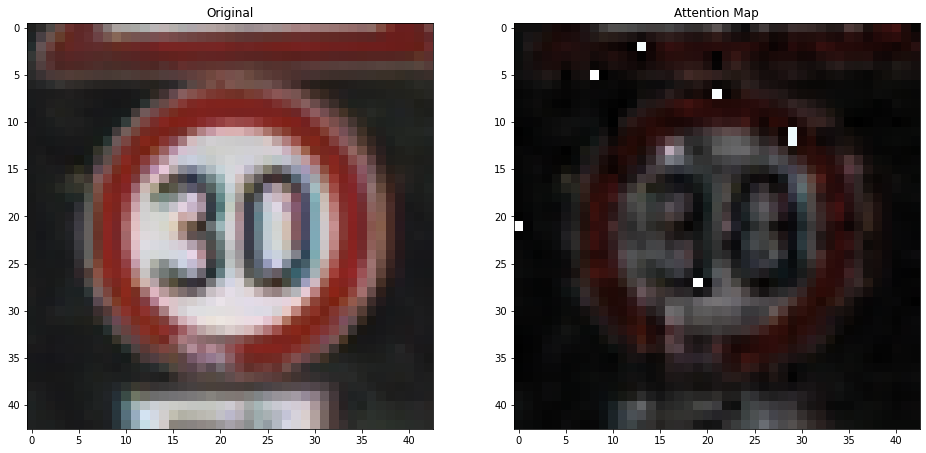

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 16))

ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(input_img)
_ = ax2.imshow(result)

In [61]:
probs = torch.nn.Softmax(dim=-1)(logits)
print(f"Image belongs to class {probs.argmax()}")

Image belongs to class 1
